In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

In [12]:
df = pd.read_csv('../Data/Telco-Customer-Churn.csv')


In [13]:
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [14]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [15]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [16]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, y_proba))

 Confusion Matrix:
 [[915 118]
 [181 193]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

 ROC AUC Score: 0.8319856500199306


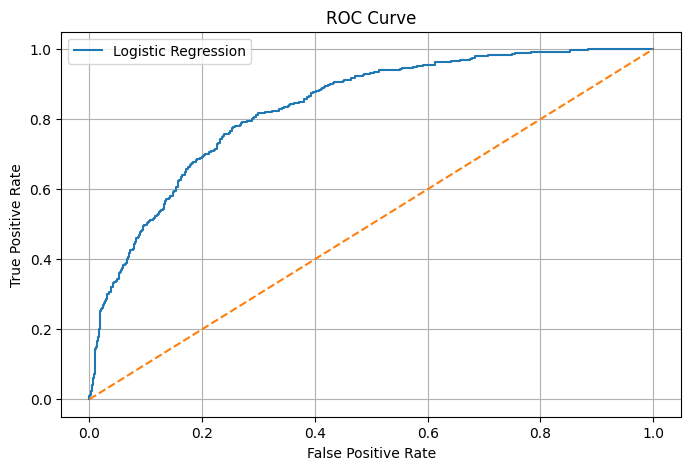

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
import os


os.makedirs('../Saved_Model', exist_ok=True)

# Now save feature names
joblib.dump(feature_names, '../Saved_Model/feature_names.pkl')


['../Saved_Model/feature_names.pkl']

In [26]:
joblib.dump(model, '../Saved_Model/churn_model.pkl')
joblib.dump(scaler, '../Saved_Model/scaler.pkl')

['../Saved_Model/scaler.pkl']